# M1 MIASHS - Outils professionnels
## Découverte de Pandas
<img src="Images/Python.gif" alt="drawing" width="200"/>

# Sommaire
- [1. Datamanagement](#sect1)
    - [1.1. Import des données](#sect11)
    - [1.2. Aperçu des données](#sect12)
    - [1.3. Manipulation d'un dataframe](#sect13)
    - [1.4. Suppression des données manquantes](#sect14)
- [2. Analyse](#sect2)
    - [2.1. Qui sont les passagers du titanic](#sect21)
    - [2.2. D'où viennent-ils ?](#sect22)
    - [2.3. Quels sont les passagers seuls ?](#sect23)
    - [2.4. Quels facteurs pour identifier les survivants ?](#sect24)

## 1. <a name="sect1"></a>Datamanagement
### 1.1. <a name="sect11"></a>Import des données
*Les modules à charger*

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Les données*

In [9]:
titanic_train = pd.read_csv('Data/titanic_train.csv')

### <a name="sect12"></a>1.2. Aperçu des données
***Description des variables***
* **survival** :       Survivant (0 = Non; 1 = Oui)
* **pclass**  :        Classe passagère (1 = 1ère; 2 = 2ème; 3 = 3ème)
* **name**     :       Nom
* **sex**       :      Sexe
* **age**        :     Age
* **sibsp**       :    Nombre de fréres/soeurs/conjoints à bord
* **parch**        :   Nombre de parents/enfants à bord
* **ticket**        :  Numéro du ticket
* **fare**          :  Tarif passager
* **cabin**         :  Numéro de cabine
* **embarked**      :  Port d'embarquation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [10]:
# Afficher le type de l'objet titanic_train avec la fonction type
type(titanic_train)

pandas.core.frame.DataFrame

In [11]:
# Afficher le nombre de columns en utilisant l'attribut columns
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Afficher les dimensions de la table en utilisant l'attribut shape
titanic_train.shape

(891, 12)

In [13]:
# Afficher les 7 premières lignes en utilisant la méthode head
titanic_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [7]:
# Afficher les 8 dernières lignes en utilisant la méthode tail
titanic_train.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [8]:
# Afficher les informations globales avec la méthode info
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Afficher le type de chaque colonne en utilisant l'attribut dtypes
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Afficher les statistiques générales avec la méthode describe pour TOUTES les variables
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Connaghton, Mr. Michael",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### <a name="sect13"></a>1.3. Manipulation d'un dataframe


In [11]:
# Paramètre pour réduire le nombre de lignes et de colonnes à afficher au maximum
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [12]:
# Selection la 3ème ligne en utilisant iloc
titanic_train.iloc[2,:]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [13]:
# Selectionner la 3ème ligne en utilisant loc
titanic_train.loc[2,:]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [14]:
# Selectionner la colonne 'Age' en utilisant iloc
titanic_train.iloc[:,5]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
       ... 
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
# Selectionner la colonne 'Age' en utilisant loc
titanic_train.loc[:,'Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
       ... 
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
# Selectionner la 3ème et la 10ème ligne et les colonnes 'Survived' et 'Age' avec iloc
titanic_train.iloc[[2,9],[1,5]]

,Survived,Age
2,1,26.0
9,1,14.0


In [17]:
# Selectionner la 3ème et la 10ème ligne et les colonnes 'Survived' et 'Age' avec loc
titanic_train.loc[[2,9],['Survived','Age']]

,Survived,Age
2,1,26.0
9,1,14.0


In [18]:
# Selectionner de la 1ère à la 5ème ligne et les 3 dernières colonnes en utilisant iloc
titanic_train.iloc[0:5,-3:]

,Fare,Cabin,Embarked
0,7.2500,NaN,S
1,71.2833,C85,C
2,7.9250,NaN,S
3,53.1000,C123,S
4,8.0500,NaN,S


In [19]:
# Selectionner de la 1ère à la 5ème colonne et les 3 dernières colonnes en utilisant loc
titanic_train.loc[0:4,'Fare':]

,Fare,Cabin,Embarked
0,7.2500,NaN,S
1,71.2833,C85,C
2,7.9250,NaN,S
3,53.1000,C123,S
4,8.0500,NaN,S


In [20]:
# Afficher uniquement la colonne "Survived"
titanic_train.Survived
# ou titanic_train['Survived']
# ou titanic_train.loc[:,'Survived']
# ou titanic_train.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
      ..
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
# Afficher les colonnes "Survived" et "Age"
titanic_train[['Survived','Age']]
# ou titanic_train.loc[:,['Survived','Age']]
# ou titanic_train.iloc[:,[1,5]]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


### <a name="sect14"></a>1.4. Suppression des données manquantes

In [22]:
# Supprimer la colonne cabine qui a trop de valeurs manquantes
titanic_train.drop('Cabin',axis=1, inplace = True)

In [23]:
# Remplacer les valeurs manquantes de l'âge par la moyenne
titanic_train.Age.fillna(titanic_train.Age.mean(), inplace = True)

#ou
values = {'Age': titanic_train.Age.mean()}
titanic_train.fillna(value=values, inplace = True)

In [24]:
# Supprimer les lignes pour lequel il reste des valeurs manquantes
titanic_train.dropna(axis=0, inplace = True)

In [25]:
# Afficher une nouvelle fois les infos globales 
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
# Réafficher les dimensions du dataframe
titanic_train.shape

(889, 11)

## <a name="sect2"></a>2. Analyse
### <a name="sect21"></a>2.1. Qui sont les passagers du titanic ?

In [27]:
# Regarder la répartition du genre en utilisant la méthode value_counts
titanic_train.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

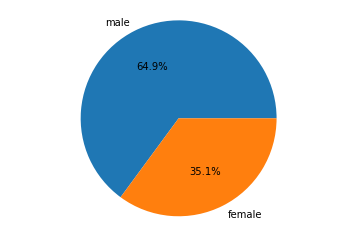

In [28]:
# Afficher la répartition du genre sous forme de graphique
# en utilisant la fonction pie du package matplotlib
plt.pie(titanic_train.Sex.value_counts(dropna = False), 
        labels = titanic_train.Sex.value_counts(dropna = False).index, 
        autopct='%1.1f%%')
plt.axis('equal')
plt.show()

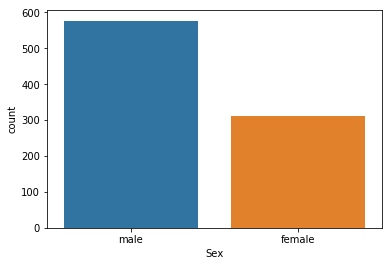

In [29]:
# Afficher la répartition du genre sous forme de graphique 
# en utilisant la fonction countplot du package seaborn
sns.countplot(titanic_train.Sex)

In [30]:
# Créer une column "Person" qui prend les modalités "homme", "femme" et "child" (âge < 21)
titanic_train.loc[titanic_train['Age'] < 21,'Person'] = 'child'
titanic_train.loc[(titanic_train['Age'] >= 21) & (titanic_train['Sex'] == 'male'),'Person'] = 'homme'
titanic_train.loc[(titanic_train['Age'] >= 21) & (titanic_train['Sex'] == 'female'),'Person'] = 'femme'

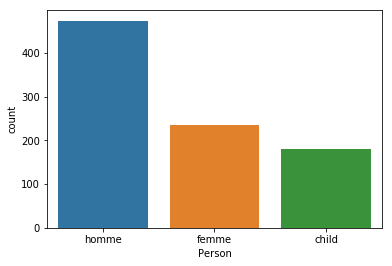

In [31]:
# Afficher la répartition de 'Person' sous forme de graphique 
# en utilisant la fonction countplot du package seaborn
sns.countplot(titanic_train.Person)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0eaa26e80>]],
      dtype=object)

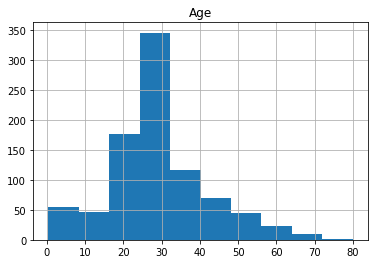

In [32]:
# Afficher l'histogramme de l'age en utilisant la méthode hist du package pandas
titanic_train.hist(column = ['Age'])

In [35]:
# Créer les tranches d'age suivante en utilisant la methode cut et ajouter le resultat dans une nouvelle colonne 'tranche_age'
# '[0-20ans]', ']20-40ans]', ']40-60ans]' et 'sup 60ans'
borne = [0,20,40,60,max(titanic_train.Age)]
titanic_train['tranche_age'] = pd.cut(titanic_train.Age, bins=borne, include_lowest = True, labels = ['[0-20ans]', ']20-40ans]', ']40-60ans]', 'sup 60ans'])

In [36]:
titanic_train['tranche_age'].value_counts()

]20-40ans]    561
[0-20ans]     179
]40-60ans]    128
sup 60ans      21
Name: tranche_age, dtype: int64

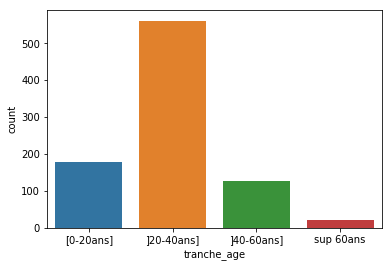

In [37]:
# Afficher la répartition par tranche d'âge
# en utilisant la fonction countplot du package seaborn
sns.countplot(titanic_train.tranche_age)

In [39]:
# Afficher la répartition des modalités de 'Person' en utilisant la méthode value_counts()
titanic_train.Person.value_counts(dropna=False)

homme    474
femme    235
child    180
Name: Person, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


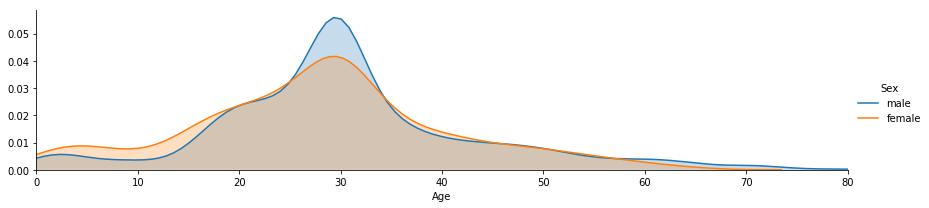

In [40]:
# FacetGrid permet d'afficher plusieurs courbes de densités sur un même graphique (ici, selon la variable 'Sex')
fig = sns.FacetGrid(titanic_train, hue="Sex",aspect=4)
# On utilise ensuite la fonction map pour tracer les courbes des densités de la variable 'Age' selon la variable choisie dans hue
fig.map(sns.kdeplot,'Age',shade= True)
# On définit ensuite les bornes min et max du graphique en le plaçant entre 0 et l'âge max
oldest = titanic_train['Age'].max()
fig.set(xlim=(0,oldest))
# On ajoute la légende 
fig.add_legend()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


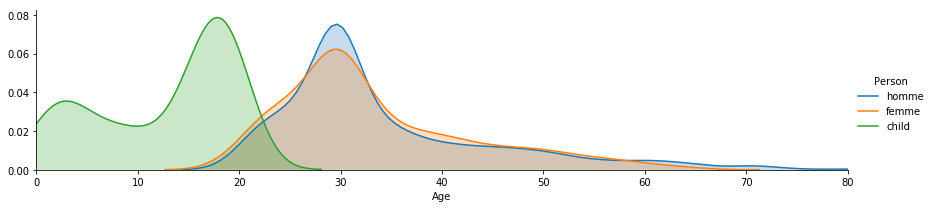

In [41]:
# Refaire le même graphique en faisant cette fois les courbes selon la variable 'Person'
fig = sns.FacetGrid(titanic_train, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### <a name="sect22"></a> 2.2. D'où viennent-ils ?

In [42]:
# Afficher la répartition de la variable 'Embarked' avec la méthode value_counts
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

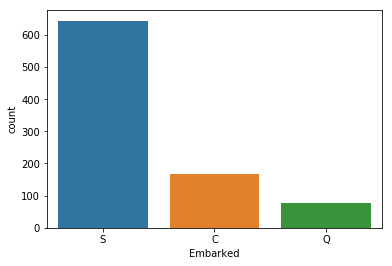

In [43]:
# Afficher la répartition de 'Embarked' sous forme de graphique 
# en utilisant la fonction countplot du package seaborn
sns.countplot(titanic_train.Embarked)

### <a name="sect23"></a>2.3. Quels sont les passagers seuls ?

In [44]:
# Créer une variable 'nb_person' qui contient le nombre de personnes avec le passager
titanic_train['nb_person'] = titanic_train.SibSp + titanic_train.Parch

In [45]:
# Créer une variable 'alone' qui indique si le passager voyage seul ou non (boolean)
titanic_train.loc[titanic_train['nb_person'] == 0, 'alone'] = True
titanic_train.loc[titanic_train['nb_person'] > 0, 'alone'] = False

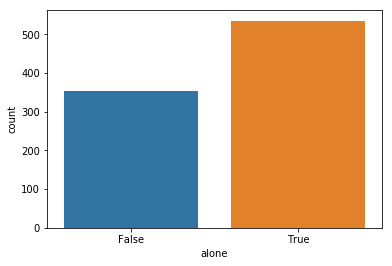

In [46]:
# Afficher la répartition de 'alone' sous forme de graphique 
# en utilisant la fonction countplot du package seaborn
sns.countplot(titanic_train.alone)

### <a name="sect24"></a>2.4. Quels facteurs pour identifier les survivants ?

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


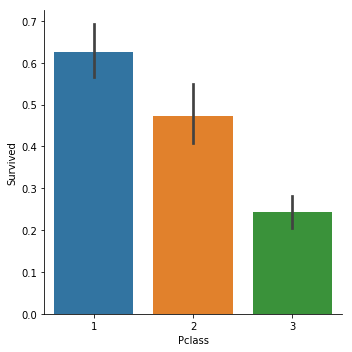

In [47]:
# Afficher la variable 'Survived' selon la variable 'Pclass'
# en utilisant la fonction catplot du package seaborn
sns.catplot(x="Pclass", y="Survived", kind="bar", data=titanic_train);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


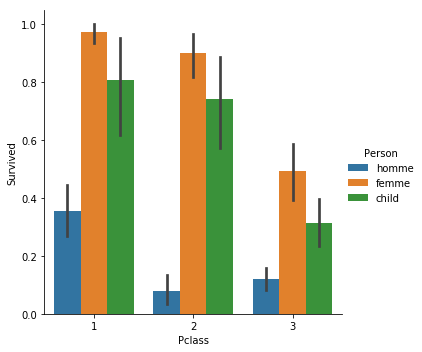

In [48]:
# Afficher la variable 'Survived' selon les variables 'Pclass' et 'Person'
# en utilisant la fonction catplot du package seaborn
sns.catplot(x="Pclass", y="Survived", kind="bar", hue = 'Person', data=titanic_train);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


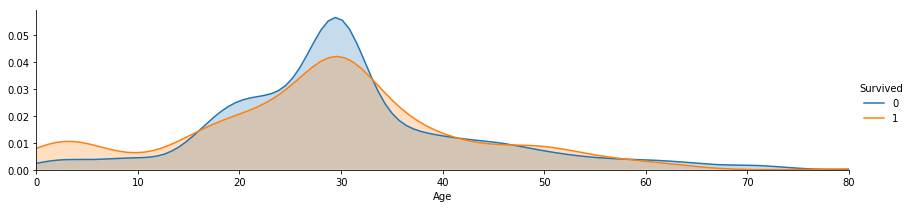

In [49]:
# Afficher la courbe de densité de la variable 'Age' selon la variable 'Survived'
fig = sns.FacetGrid(titanic_train, hue="Survived",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Autres idées ?